My Name: NAYAB ANWAR

Internship Domain: Data Science & Business Analytics

My Task No & Work Title: 3, Prediction Using Decision Tree Algorithm

Work: Create The Decision Tree Classifier And Visualise It Graphically

Target: If we feed any new dataset to this classifier,it would be able to predict the right class accordingly



In [1]:
# Importing some basic library.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset And Reading It.
data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRv0XFc28GJJxX2e6nDEYRSIR2awVWexUrerywQVBFA8mbTJuSOfkQZrs1pD4xYNaBsW7H1Xcb4Bcpo/pub?gid=2118829072&single=true&output=csv")

In [3]:
# Dataset
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Cheking Unique value of target column.
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Mapping unique value of label column for our ML model.
data['Species']=data['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [6]:
# cheking dataset after mapping
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [7]:
# Cheking bottom of dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3
149,150,5.9,3.0,5.1,1.8,3


In [8]:
# Descriptive analysis of dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [9]:
# Cheking null values of n dataset
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# cheking data type of dataset and some additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [11]:
# Dropping 'Id' column which will not use in our model.
data=data.drop(['Id'],axis=1)

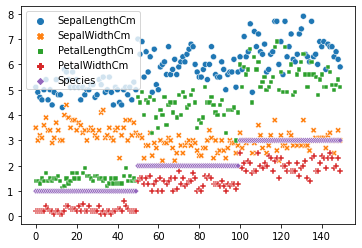

In [12]:
# Scatterplot to see our data distribution
h=sns.scatterplot(data=data)

In [13]:
# show all column name
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
# Dividing our data into feature and label colun
X=data.drop(['Species'],axis=1)
y=data['Species']

<Figure size 1080x720 with 0 Axes>

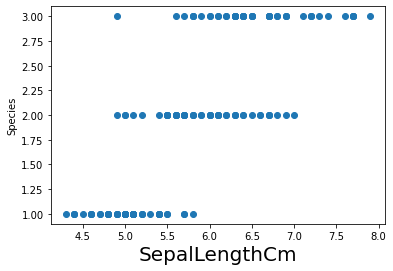

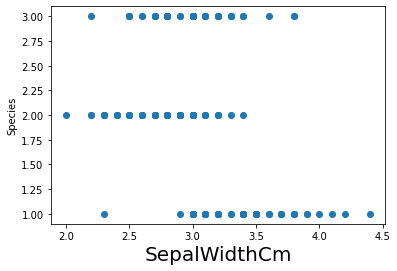

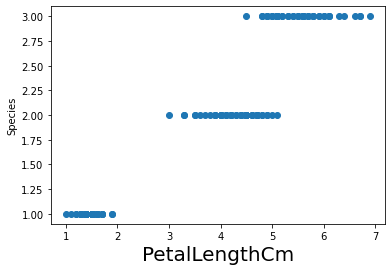

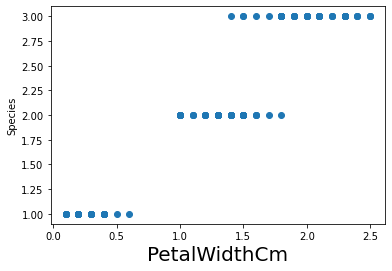

In [15]:
# Scatterplot to show all feature column's data against label column. 
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in X.columns:
    if plotnumber <=6:
        ax=plt.subplots(plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Species')
plotnumber+=1
plt.show()

In [16]:
# Importing Decision Tree Model and tree library to plot graph of decision tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [17]:
#splitting 'X' & 'Y' dataset for training and testing. 
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [18]:
# Showing my train data
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
139,6.9,3.1,5.4,2.1
77,6.7,3.0,5.0,1.7
147,6.5,3.0,5.2,2.0
119,6.0,2.2,5.0,1.5
...,...,...,...,...
83,6.0,2.7,5.1,1.6
6,4.6,3.4,1.4,0.3
67,5.8,2.7,4.1,1.0
44,5.1,3.8,1.9,0.4


In [19]:
# Showing my train_y data.
train_y

1      1
139    3
77     2
147    3
119    3
      ..
83     2
6      1
67     2
44     1
75     2
Name: Species, Length: 112, dtype: int64

In [20]:
# Creating Instance of DecisionTree Model
dec_clf=DecisionTreeClassifier()

In [21]:
# Training our model.
dec_clf.fit(train_x,train_y)

DecisionTreeClassifier()

In [22]:
#Feeding some data to predict class.This time I am feeding my training data set to check weather my model is able to predict correct class or not.
dec_clf.predict([[6.7,3.1,5.6,2.4]])

array([3], dtype=int64)

Feeding my new dataset to predict class of that data.

In [23]:
# Feeding New Dataset.
dec_clf.predict([[5.1,3.6,1.3,0.3]])

array([1], dtype=int64)

Thats Great !! My model successfully predicted the class.

Process for graphically representation.

In [24]:
# Creating object of my all features.
feature_name=list(X.columns)

In [25]:
# For Graphically representation.
dec_clf=tree.DecisionTreeClassifier(random_state=0)
dec_clf=dec_clf.fit(train_x,train_y)

[Text(334.8, 489.24, 'X[3] <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [36, 40, 36]'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(167.4, 271.8, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(669.6, 271.8, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(585.9, 163.08000000000004, 'X[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6

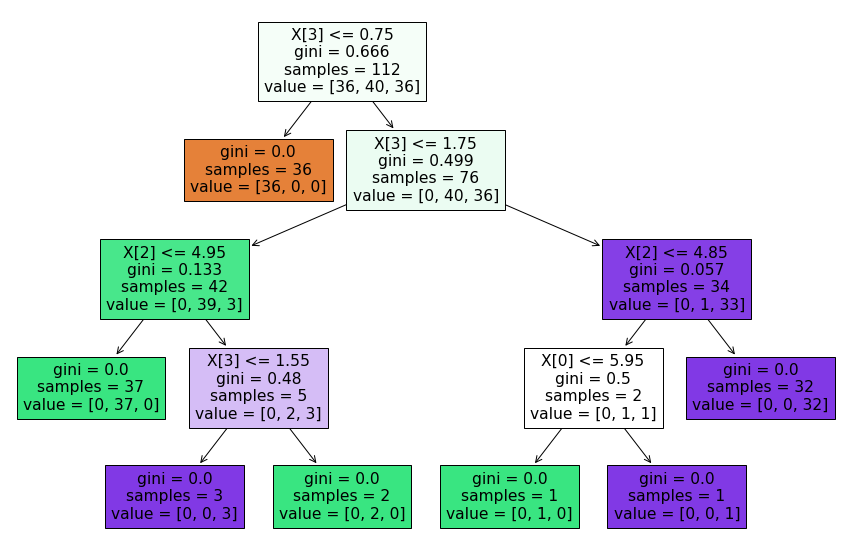

In [26]:
# Creating Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dec_clf,filled=True)

Thats Great !!. I have successfully created graphically representation of Decision Tree

In [27]:
# Some more imformative representation.
print(tree.export_text(dec_clf))

|--- feature_3 <= 0.75
|   |--- class: 1
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 3
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 3
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 3



Thank You!